In [5]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [6]:
image_size=256
batch_size=32

In [7]:
dataset =tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)

Found 2152 files belonging to 3 classes.


In [8]:
class1 = dataset.class_names
class1

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

Potato___Early_blight
Potato___Late_blight
Potato___Early_blight
Potato___Late_blight
Potato___Late_blight
Potato___Early_blight
Potato___Late_blight
Potato___Early_blight
Potato___healthy
Potato___Late_blight
Potato___Early_blight
Potato___Late_blight


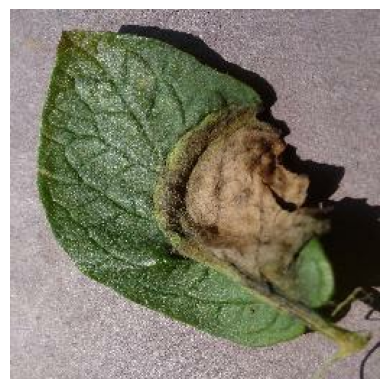

In [10]:
for images, label in dataset.take(1):  # Step 1
    for i in range(12):  # Step 2
        plt.imshow(images[i].numpy().astype("uint8"))  # Step 3
        print(class1[label[i]])  # Step 4
        plt.axis("off")  # Step 5


In [11]:
len(dataset)

68

In [12]:
train_size=0.8
len(dataset)*0.8

54.400000000000006

In [13]:
train=dataset.take(54)
test=dataset.skip(54)
len(train)
len(test)

14

In [14]:
val=test.take(6)
test=test.skip(6)

In [15]:
def get(ds, train_s=0.8, val_split=0.1, test_split=0.1, shuffle=True):
    size = len(ds)  # Get dataset size

    if shuffle:
        ds = ds.shuffle(size, seed=12)  # Shuffle the dataset

    train_size = int(train_s * size)
    val_size = int(val_split * size)

    train_ds = ds.take(train_size)  # First 'train_size' samples for training
    remaining = ds.skip(train_size)  # Skip training data

    val_ds = remaining.take(val_size)  # Take 'val_size' samples for validation
    test_ds = remaining.skip(val_size)  # Remaining samples for testing

    return train_ds, val_ds, test_ds  # Return the three datasets


In [16]:
train,val,test=get(dataset)

In [17]:
len(val)

6

In [18]:
train=train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test=test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val=val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
from tensorflow.keras import layers

In [20]:
resize = tf.keras.Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1.0 / 255)
])


In [21]:

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),  # Randomly flip images horizontally
    layers.RandomRotation(0.2),       # Rotate images by up to 20% (in radians)
    layers.RandomZoom(0.2),           # Randomly zoom images by up to 20%
    layers.RandomContrast(0.2),       # Adjust contrast by up to 20%
    layers.RandomTranslation(height_factor=0.2, width_factor=0.2),  # Random shift
])

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_shape = (256, 256, 3)  # ✅ Correct input shape
n = 3  # Number of output classes

resize = tf.keras.Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1.0 / 255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

model = models.Sequential([
    resize,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2,2)),  
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2,2)),  
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n, activation='softmax')  # Softmax for multi-class classification
])

model.build()  # To check model structure


C:\Users\rg967\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [24]:
history=model.fit(
    train,
    epochs=20,
    batch_size=batch_size,
    verbose=1,
    validation_data=val
)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 564ms/step - accuracy: 0.5497 - loss: 0.8607 - val_accuracy: 0.7292 - val_loss: 1.1837
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 537ms/step - accuracy: 0.8202 - loss: 0.4301 - val_accuracy: 0.8438 - val_loss: 0.5900
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 540ms/step - accuracy: 0.9136 - loss: 0.2342 - val_accuracy: 0.8177 - val_loss: 0.5744
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 546ms/step - accuracy: 0.9049 - loss: 0.2724 - val_accuracy: 0.8750 - val_loss: 0.3208
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 557ms/step - accuracy: 0.9343 - loss: 0.1769 - val_accuracy: 0.9583 - val_loss: 0.1151
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 522ms/step - accuracy: 0.9681 - loss: 0.1015 - val_accuracy: 0.7760 - val_loss: 0.6751
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 526ms/step - accuracy: 0.9450 - loss: 0.1321 - val_accuracy: 0.9271 - val_loss: 0.1828
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 520ms/step - accuracy: 0.9448 - loss: 0.1439 - val_accu

In [25]:
scores=model.evaluate(test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.9208 - loss: 0.2265


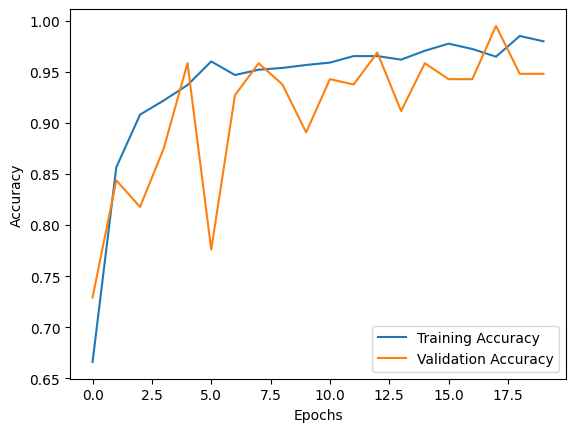

In [26]:
import matplotlib.pyplot as plt

# Get training & validation loss/accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training vs validation accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


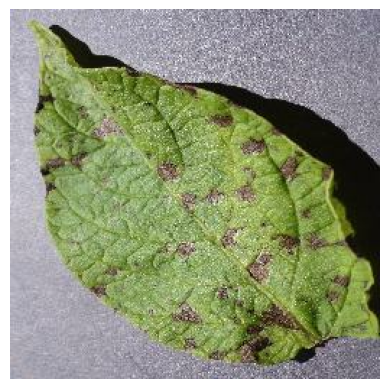

Actual Label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
Predicted Label: Potato___Early_blight


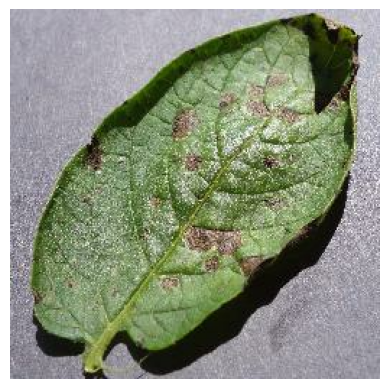

Actual Label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Predicted Label: Potato___Early_blight


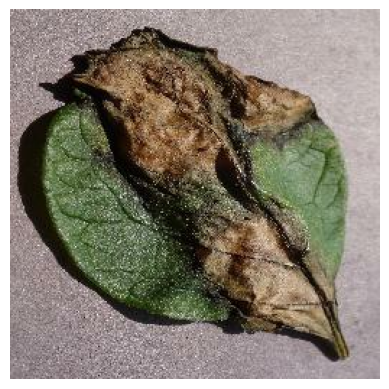

Actual Label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Predicted Label: Potato___Early_blight


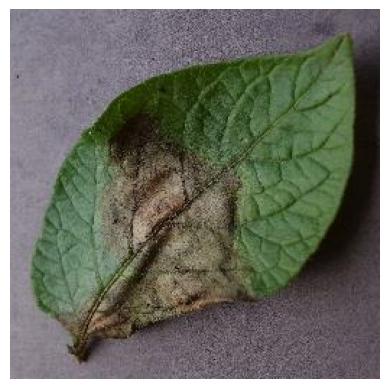

Actual Label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Predicted Label: Potato___Late_blight


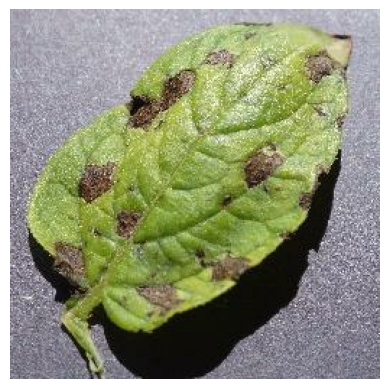

Actual Label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Predicted Label: Potato___Early_blight


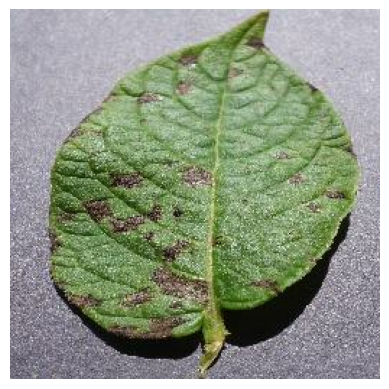

Actual Label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Predicted Label: Potato___Early_blight


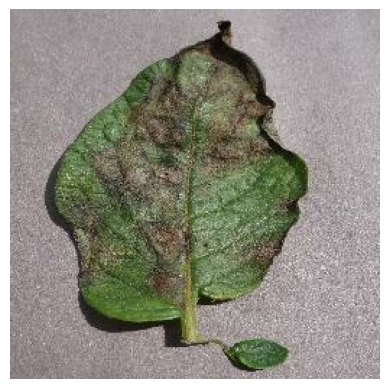

Actual Label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Predicted Label: Potato___Early_blight


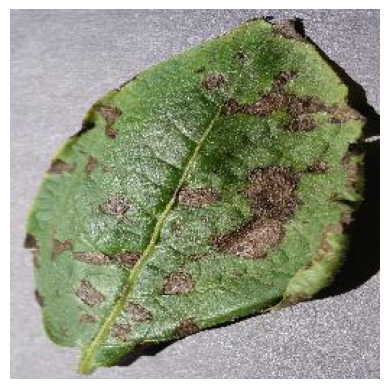

Actual Label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Predicted Label: Potato___Early_blight


In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'class1' is a dictionary mapping labels to class names
for images, labels in test.take(12):
    first = images[0].numpy().astype('uint8')  # Convert image to uint8
    plt.imshow(first)  # Display the image
    plt.axis("off")  # Hide axes for better visualization
    plt.show()  # Show the image
    
    print(f"Actual Label: {class1[int(labels[0])]}")  # Convert label to int before indexing

    # Model Prediction
    batch_predictions = model.predict(images)  # Predict on batch
    # Printing the NumPy array of images (not calling numpy method correctly in your original code)
    print("Predicted Label:", class1[np.argmax(batch_predictions[0])])



In [30]:
import os
model1=2

# Define model save path
model_path = f"../models/model_{model1}.h5"

# Create directory if it doesn't exist
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Save model
model.save(model_path)
